Tsukamoto Fuzzy Inference System

In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 7.6 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=c8ce5736f6e9795ab05acb7e59cdcee6ae3f54068093e853c61b2ae526cb2d53
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

In [172]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
#Defining the Input Variables (Fuzzification)
ambient = ctrl.Antecedent(np.arange(0, 800, 1), 'ambient') #Lux
power = ctrl.Consequent(np.arange(0, 21, 1), 'power',  defuzzify_method='centroid')#watts


In [173]:
ambient['dark'] = fuzz.gbellmf(ambient.universe, a=150, b=2, c=0)
ambient['medium'] = fuzz.gbellmf(ambient.universe, a=150, b=2, c=400)
ambient['bright'] = fuzz.gbellmf(ambient.universe, a=150, b=2, c=800)


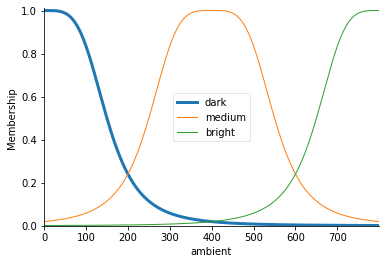

In [174]:
ambient['dark'].view()

In [175]:
power['low'] = fuzz.sigmf(power.universe, c=0.5, b=5)
power['medium'] = fuzz.sigmf(power.universe, c=0.5, b=10)
power['high'] = fuzz.sigmf(power.universe, c=0.5, b=12)

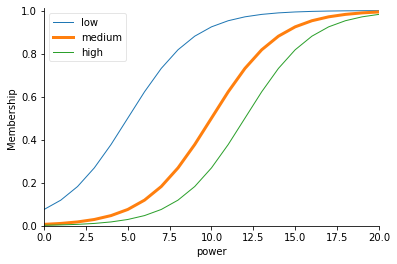

In [176]:
power['medium'].view()

In [177]:
#Rules
rule1 = ctrl.Rule(ambient['dark'] , power['high'])
rule2 = ctrl.Rule(ambient['medium'] , power['medium'])
rule3 = ctrl.Rule(ambient['bright'] , power['low'])


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f013550d610>)

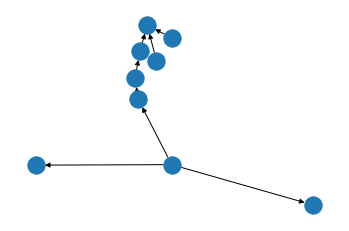

In [178]:
rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f013530a050>)

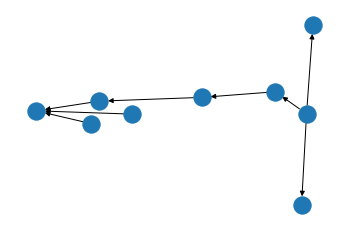

In [179]:
rule2.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0135b23890>)

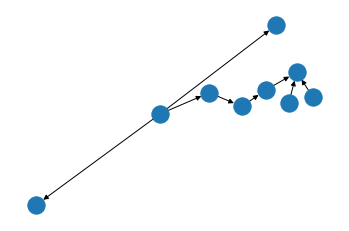

In [180]:
rule3.view()

13.992764176378772


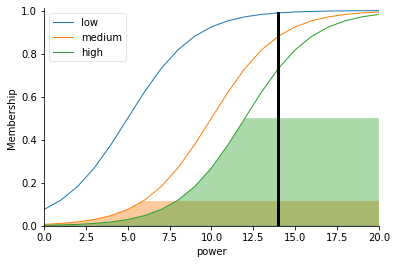

In [181]:
illumination_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
illumination = ctrl.ControlSystemSimulation(illumination_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
illumination.input['ambient'] = 150
# Crunch the numbers
illumination.compute()
print(illumination.output['power'])
power.view(sim=illumination)
